# **Selenium**

In [ ]:
!pip install bs4 selenium
!apt install chronium-chromedriver

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=87bb1ea1ae68cca8572f11d84bc5ed69646dbfeb3c6e467cfe5be2e9fd6e50d6
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package chronium-chromedriver


In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chromium.webdriver import ChromiumDriver
from selenium.webdriver.common.by import By
import csv
import time
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
options.add_argument('no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:
driver = webdriver.Chrome(options)

In [ ]:
urlPath = 'https://www.youtube.com/@UnfoldDataScience/videos'
driver.get(urlPath)

In [ ]:
videos = driver.find_elements(By.CLASS_NAME, "style-scope ytd-rich-item-renderer")

for video in videos:
    titles = driver.find_elements(By.XPATH,'.//*[@id="video-title"]')
    views = driver.find_elements(By.XPATH,'.//*[@id="metadata-line"]/span[1]')
    dates = driver.find_elements(By.XPATH, './/*[@id="metadata-line"]/span[2]')

In [ ]:
likesData = []

try:
  for like in videos:
    wait = WebDriverWait(driver,15)
    descp = driver.find_element(By.XPATH, '//*[@id="video-title-link"]')
    driver.execute_script("arguments[0].click();", descp)
    path = '//*[@id="segmented-like-button"]/ytd-toggle-button-renderer/yt-button-shape/button'
    likecount = wait.until(EC.presence_of_element_located((By.XPATH, path)))
    likes = likecount.text
    likesData.append(likes)

except:
  likesData = ""

In [ ]:
commentsData = []
try:
  wait = WebDriverWait(driver,15)
  for video in videos:
    descp = driver.find_element(By.XPATH, '//*[@id="video-title-link"]')
    driver.execute_script("arguments[0].click();", descp)
    path = "//div[@id='title']//*[@id='count']//span[1]"
    commentsCount = wait.until(EC.presence_of_element_located((By.XPATH, path))).text
    comments_count = driver.find_element(By.CSS_SELECTOR, "#count button").strip()
    comments = commentsCount

except:
  commentsData = ""

In [ ]:
titlesData = []
for title in titles:
    titlesData.append(title.text)

viewsData = []
for view in views:
    viewsData.append(view.text)

datesData = []
for date in dates:
    datesData.append(date.text)

df = pd.DataFrame({'title': titlesData, 'views': viewsData, 'dates' : datesData, 'likes' : likes, 'comments' : comments})
df.to_csv('Youtube.csv', index=False)

In [ ]:
YoutubeDF = pd.read_csv('Youtube.csv')

**Calculate the average views count per video for videos uploaded in the last 30
days.**

In [ ]:
from datetime import datetime, timedelta
def AvergaeViews(df):
  videos = YoutubeDF[YoutubeDF['dates'] >= '1 month ago']
  YoutubeDF['NumericViews'] = videos['views'].replace(r'[Kk]', '', regex=True).astype(float) * 1000
  average = YoutubeDF['NumericViews'].mean()
  print("Average views count per video for videos uploaded in the last 30 days is", average)

AvergaeViews(YoutubeDF)

Average views count per video for videos uploaded in the last 30 days is 165830.0


**Identify the video with the highest likes-to-views ratio.**

In [ ]:
def HighestRatio(df):
  YoutubeDF['NumericViews'] = YoutubeDF['views'].replace(r'[Kk]', '', regex=True).astype(float) * 1000
  YoutubeDF['likes_to_views_ratio'] = YoutubeDF['likes'] / YoutubeDF['NumericViews']
  Highestratio = YoutubeDF.loc[YoutubeDF['likes_to_views_ratio'].idxmax()]
  print("Video with the highest likes-to-views ratio is:",Highestratio)
HighestRatio(YoutubeDF)

Video with the highest likes-to-views ratio is title                   6 Activation functions for deep learning | act...
views                                                               1.2K 
dates                                                         3 weeks ago
likes                                                                  54
comments                                                               25
NumericViews                                                       1200.0
likes_to_views_ratio                                                0.045
Name: 5, dtype: object


**Find the correlation between the number of likes and the number of comments for the videos.**

In [ ]:
def corr(YoutubeDF):
  correlation = YoutubeDF['likes'].corr(YoutubeDF['comments'])
  print("Correlation between likes and comments:", correlation)
corr(YoutubeDF)

Correlation between likes and comments: -0.209752324962911


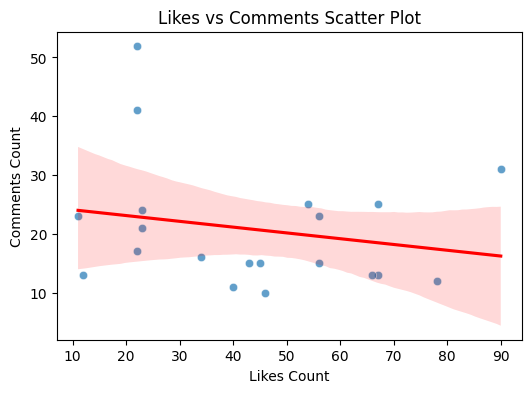

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x='likes', y='comments', data=YoutubeDF, alpha=0.7)
sns.regplot(x='likes', y='comments', data=YoutubeDF, scatter=False, color='red')

plt.title('Likes vs Comments Scatter Plot')
plt.xlabel('Likes Count')
plt.ylabel('Comments Count')
plt.show()

**Determine the most common day of the week for video uploads.**

In [ ]:
YoutubeDF['dates'] = pd.to_datetime(YoutubeDF['dates'])
YoutubeDF['day_of_week'] = YoutubeDF['dates'].dt.dayofweek
day_of_week_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
YoutubeDF['day_of_week_name'] = YoutubeDF['day_of_week'].map(day_of_week_names)
most_common_day = YoutubeDF['day_of_week_name'].mode()[0]
print("The most common day of the week for video uploads is:", most_common_day)

**Detect any outliers in the views count.**

Outliers in views count:
                                                title  views         dates  \
7               Andrew Ng: Opportunities in AI - 2023  767K    3 weeks ago   
9   p-values: What they are and how to interpret them  903K    3 years ago   
18               5 Math Skills Every Programmer Needs  828K   8 months ago   

    likes  comments  NumericViews  
7      22        17      767000.0  
9      43        15      903000.0  
18     78        12      828000.0  


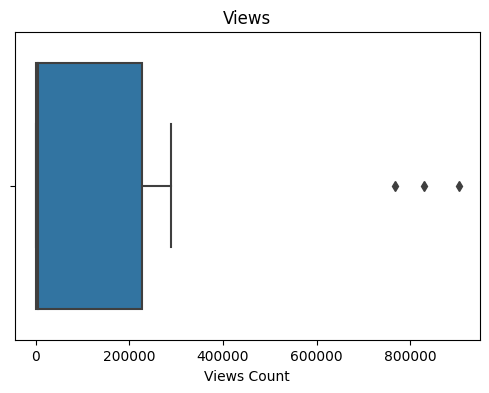

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def outliers(YoutubeDF):
  YoutubeDF['NumericViews'] = YoutubeDF['views'].replace(r'[Kk]', '', regex=True).astype(float) * 1000

  Q1 = YoutubeDF['NumericViews'].quantile(0.25)
  Q3 = YoutubeDF['NumericViews'].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = YoutubeDF[(YoutubeDF['NumericViews'] < lower_bound) | (YoutubeDF['NumericViews'] > upper_bound)]

  print("Outliers in views count:")
  print(outliers)

  plt.figure(figsize=(6, 4))
  sns.boxplot(x=YoutubeDF['NumericViews'])
  plt.title('Views')
  plt.xlabel('Views Count')
  plt.show()
outliers(YoutubeDF)

# **BeautifulSoup**

In [ ]:
! python -m pip install BeautifulSoup4
! python -m pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

In [ ]:
URL='https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=%22+str(page)+%22&ref_=adv_nxt'
response=requests.get(URL)

In [ ]:
soup=BeautifulSoup(response.content,'html.parser')

In [ ]:
headers = {"Accept-Language": "en-US,en;q=0.8"}
response = requests.get(URL,headers=headers)
soup=BeautifulSoup(response.text,'html.parser')

In [ ]:
MovieTitle = []
ReleaseYear = []
IMDbRating = []
Genre = []
Director= []

movies = soup.find_all('div', class_='lister-item mode-advanced')

for movie in movies:
  #Title
  title = movie.find('h3', class_='lister-item-header').find('a').text.strip()

  #Release Year
  year = movie.find('span', class_='lister-item-year')
  releaseyear = year.text.strip('()')

  Release_Year = ''
  for y in releaseyear:
    if y.isnumeric():
      Release_Year += y

  if Release_Year.isnumeric():
    Release_Year = int(Release_Year)
  else:
    Release_Year = None

  #Genre
  genre = movie.find('span', class_='genre').text.strip()

  #Rating
  rating= movie.find('div', class_='inline-block ratings-imdb-rating').text.strip()

  #Director
  director = movie.find('p', class_='').find('a').text


  if 2013 <= Release_Year <= 2023:
    MovieTitle.append(title)
    Genre.append(genre)
    ReleaseYear.append(Release_Year)
    IMDbRating.append(rating)
    Director.append(director)

In [ ]:
df = pd.DataFrame({'Movie Titles':MovieTitle,'Release Year':ReleaseYear,'IMDb Rating': IMDbRating,'Directors': Director,'Genre': Genre})
df.to_csv('IMDB.csv', index=False)

In [ ]:
IMDB = pd.read_csv('IMDB.csv')

**Average IMDb rating for the top-rated movies.**

In [ ]:
def AverageIMDBrating(df):
  average = df['IMDb Rating'].mean()
  print('Average IMDb rating is', average)
AverageIMDBrating(IMDB)

Average IMDb rating is 8.513043478260872


**The most common genre among the top-rated movies.**

In [ ]:
def CommonGenre(df):
  commonGenre = df['Genre'].mode()[0]
  print("The most common genre among the top-rated movies is", commonGenre)
CommonGenre(IMDB)

The most common genre among the top-rated movies is Action, Drama


**Identify the director with the highest average IMDb rating.**

In [ ]:
def HighestAverageRating(df):
  AverageRating = df.groupby('Directors')['IMDb Rating'].mean()
  Rating = AverageRating.max()
  print("Director with the highest average IMDb rating is", Rating)
HighestAverageRating(IMDB)

Director with the highest average IMDb rating is 8.8
